In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('customer_segmentation_data.csv')

# Preview the dataset
print(df.head())


   id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   purchase_frequency preferred_category  last_purchase_amount  
0                  24          Groceries                113.53  
1                  42             Sports                 41.93  
2                  28           Clothing                424.36  
3                   5      Home & Garden                991.93  
4                  25        Electronics                347.08  


In [3]:
# Check data structure
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Handle missing values (example: drop rows or fillna)
df = df.dropna()  # or use df.fillna(value)

# Describe the data
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB
None
id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64
                id 

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('customer_segmentation_data.csv')

# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Print cleaned column names
print("Columns:", df.columns.tolist())

# Check and print the first few rows (optional, helps verify column names)
print(df.head())

# Replace these with your actual column names from the above output:
# Adjust column names as per actual CSV (example placeholders here)
purchase_column = 'PurchaseAmount'  # replace with actual
product_column = 'ProductCategory'  # replace with actual
customer_id_column = 'CustomerID'   # replace with actual

# Make sure the column names exist
if all(col in df.columns for col in [purchase_column, product_column, customer_id_column]):
    # Now run your calculations
    print("Average Purchase Value:", df[purchase_column].mean())
    print("Most Frequent Product Category:", df[product_column].mode()[0])
    print("Frequency of Purchases per Customer:")
    print(df[customer_id_column].value_counts().head())
else:
    print("⚠️ One or more columns are not present. Please check the actual column names above.")



Columns: ['id', 'age', 'gender', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'preferred_category', 'last_purchase_amount']
   id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   purchase_frequency preferred_category  last_purchase_amount  
0                  24          Groceries                113.53  
1                  42             Sports                 41.93  
2                  28           Clothing                424.36  
3                   5      Home & Garden                991.93  
4                  25        Electronics                347.08  
⚠️ One or more columns are not present. Please check the actual column names

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select the correct features from your dataset
features = df[['last_purchase_amount', 'purchase_frequency', 'membership_years']]

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(scaled_features)

# View the result
print(df['Segment'].value_counts())






Segment
0    279
2    249
3    244
1    228
Name: count, dtype: int64


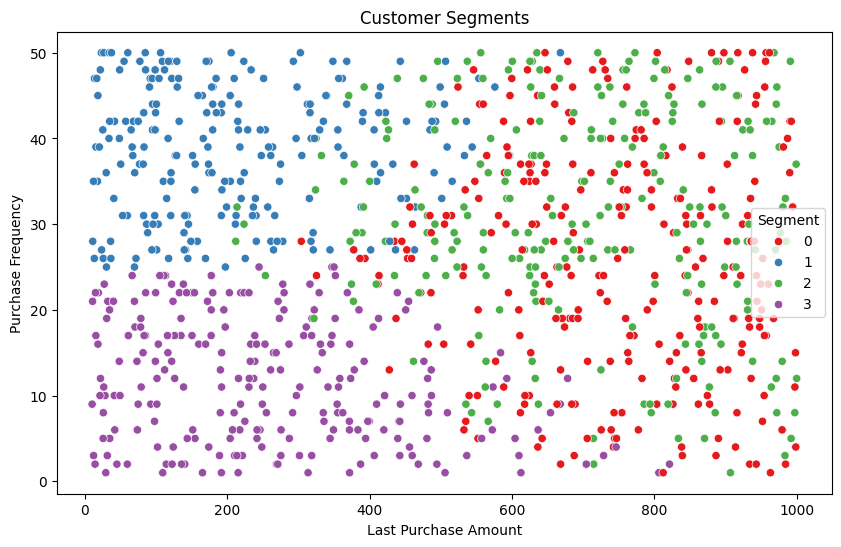

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot using actual column names
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['last_purchase_amount'],
    y=df['purchase_frequency'],
    hue=df['Segment'],
    palette='Set1'
)
plt.title('Customer Segments')
plt.xlabel('Last Purchase Amount')
plt.ylabel('Purchase Frequency')
plt.legend(title='Segment')
plt.show()



In [12]:
# Group by segments to analyze
segment_stats = df.groupby('Segment')[['Purchase Amount', 'Frequency', 'Tenure']].mean()
print(segment_stats)

# Add interpretations here manually based on stats


KeyError: "Columns not found: 'Purchase Amount', 'Tenure', 'Frequency'"